# CAR PRICE PREDICTION(Used cars)
# Steps:
- **Importing Libraries:**
- **Read Data:**
- **Data Preprocessing:**
- **Feature Engineering:**
- **Model Training:**

# Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OrdinalEncoder
import joblib as jb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')

# Read data 

In [2]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns',200)

In [3]:
car_price_data=pd.read_csv('D:/DS NOTE/OASIS INFO BYTE/Car price prediction(used cars)/trian/raw/train.csv')
car_price_data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0
1,verna,2012,4.50,9.40,36100,Petrol,Dealer,Manual,0
2,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
3,city,2016,9.15,13.60,29223,Petrol,Dealer,Manual,0
4,innova,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0
5,wagon r,2015,3.25,5.09,35500,CNG,Dealer,Manual,0
6,city,2015,8.40,13.60,34000,Petrol,Dealer,Manual,0
7,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
8,dzire,2009,2.25,7.21,77427,Petrol,Dealer,Manual,0
9,i10,2011,2.95,4.60,53460,Petrol,Dealer,Manual,0


In [4]:
# Print a concise summary of a DataFrame.
car_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       101 non-null    object 
 1   Year           101 non-null    int64  
 2   Selling_Price  101 non-null    float64
 3   Present_Price  101 non-null    float64
 4   Driven_kms     101 non-null    int64  
 5   Fuel_Type      101 non-null    object 
 6   Selling_type   101 non-null    object 
 7   Transmission   101 non-null    object 
 8   Owner          101 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 7.2+ KB


In [5]:
car_price_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0
1,verna,2012,4.50,9.40,36100,Petrol,Dealer,Manual,0
2,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
3,city,2016,9.15,13.60,29223,Petrol,Dealer,Manual,0
4,innova,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0


In [6]:
car_price_data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
96,fortuner,2010,9.25,20.45,59000,Diesel,Dealer,Manual,0
97,grand i10,2015,4.40,5.70,28200,Petrol,Dealer,Manual,0
98,swift,2011,3.00,4.99,20000,Petrol,Dealer,Manual,0
99,ciaz,2017,7.75,9.29,37000,Petrol,Dealer,Automatic,0
100,eon,2016,3.15,4.43,15000,Petrol,Dealer,Manual,0


In [7]:
car_price_data['Car_Name'].value_counts()

Car_Name
city                  12
verna                 10
corolla altis          7
innova                 6
ciaz                   5
swift                  5
grand i10              5
eon                    5
i20                    5
brio                   4
fortuner               4
jazz                   3
etios g                3
i10                    3
ertiga                 3
dzire                  2
alto k10               2
wagon r                2
etios cross            1
land cruiser           1
800                    1
creta                  1
etios liva             1
camry                  1
etios gd               1
amaze                  1
baleno                 1
ritz                   1
um renegade mojave     1
sx4                    1
xcent                  1
elantra                1
corolla                1
Name: count, dtype: int64

In [8]:
# Detect missing values
car_price_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [9]:
# denoting duplicate rows
car_price_data.duplicated().sum()

1

In [10]:
# Generate descriptive statistics.
car_price_data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,101.000000,101.000000,101.000000,101.000000,101.000000
mean,2013.425743,6.637525,11.057030,42448.059406,0.049505
std,3.204205,5.604802,10.422677,30806.572711,0.327910
min,2003.000000,0.350000,1.820000,1400.000000,0.000000
25%,2012.000000,3.450000,6.050000,21125.000000,0.000000
50%,2014.000000,5.250000,8.500000,39000.000000,0.000000
75%,2016.000000,7.500000,13.460000,52132.000000,0.000000
max,2017.000000,35.000000,92.600000,197176.000000,3.000000


# Outlier Detection 
- Detect the outlier in SepalWidthCm , outlier affect the distribution & model also we can remove the outlier
  usin Inter quantile range method to caping the outlier

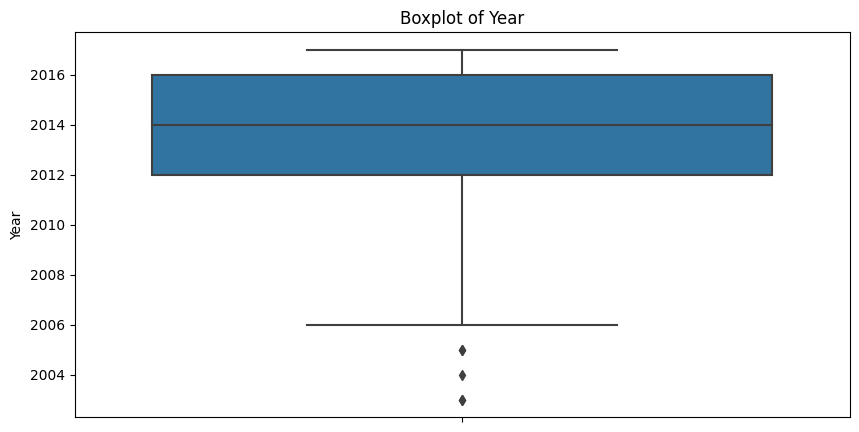

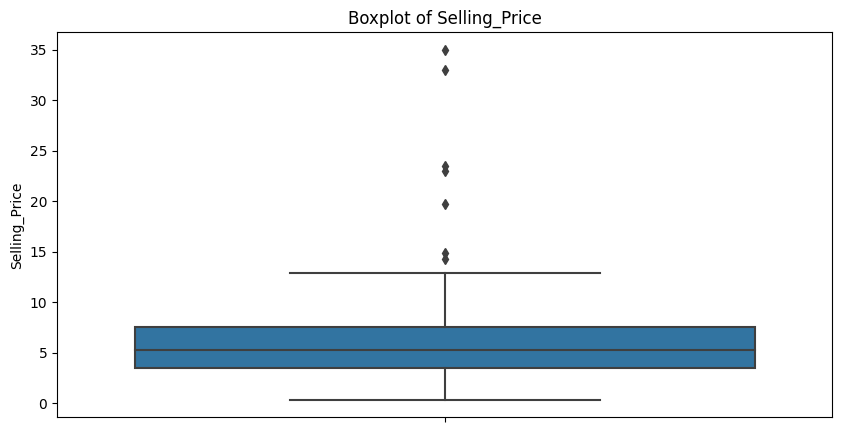

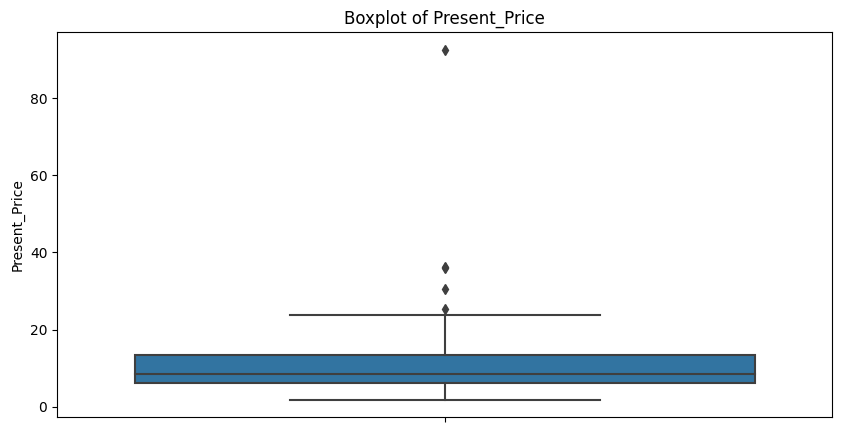

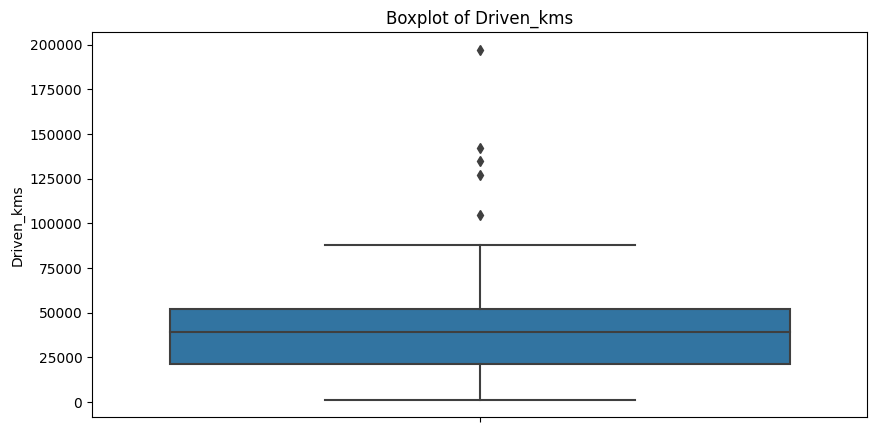

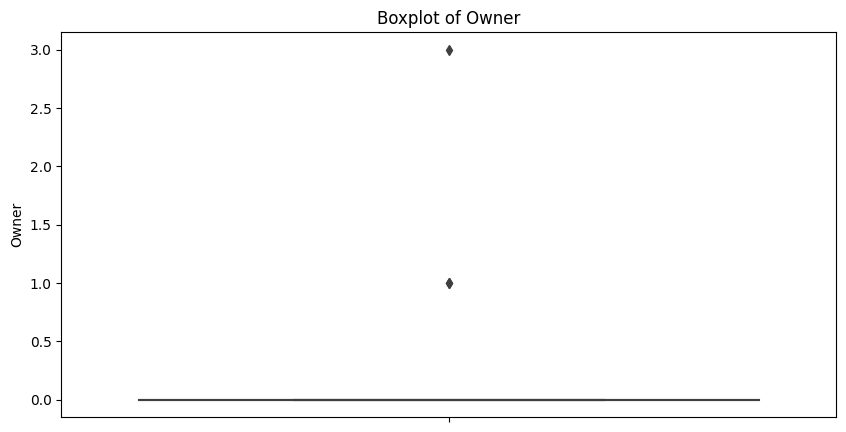

In [11]:
for column in car_price_data.columns:
    if car_price_data[column].dtype!='object':
        plt.figure(figsize=(10,5))
        sns.boxplot(y=column,data=car_price_data)
        plt.title(f'Boxplot of {column}')
        plt.show()



# IQR[Inter Quantile Range]Method
 - HANDLING OUTLIER

In [12]:
Outlier_list= {}

In [13]:
for column in ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']:
    q1=car_price_data[column].quantile(0.25)
    q3=car_price_data[column].quantile(0.75)
    IQR=q3-q1
    lower_range=q1-(1.5*IQR)
    upper_range=q3+(1.5*IQR)
    #capping 
    car_price_data[column]=np.where(car_price_data[column]<lower_range,lower_range,
               np.where(car_price_data[column]>upper_range,upper_range,
                        car_price_data[column]))
    
    Outlier_list[column]= {'q1':q1,'q3':q3,'IQR':IQR,'lower_range':lower_range, 'upper_range':upper_range}


In [14]:
for column, values in Outlier_list.items():
    print(f"Column: {column}\nq1:{values['q1']} \nq3:{values['q3']} \nIQR:{values['IQR']} \nlower_range:{values['lower_range']} \nupper_range:{values['upper_range']}\n-----------------------")

    

Column: Year
q1:2012.0 
q3:2016.0 
IQR:4.0 
lower_range:2006.0 
upper_range:2022.0
-----------------------
Column: Selling_Price
q1:3.45 
q3:7.5 
IQR:4.05 
lower_range:-2.624999999999999 
upper_range:13.575
-----------------------
Column: Present_Price
q1:6.05 
q3:13.46 
IQR:7.410000000000001 
lower_range:-5.065000000000002 
upper_range:24.575000000000003
-----------------------
Column: Driven_kms
q1:21125.0 
q3:52132.0 
IQR:31007.0 
lower_range:-25385.5 
upper_range:98642.5
-----------------------
Column: Owner
q1:0.0 
q3:0.0 
IQR:0.0 
lower_range:0.0 
upper_range:0.0
-----------------------


# After handling outlier

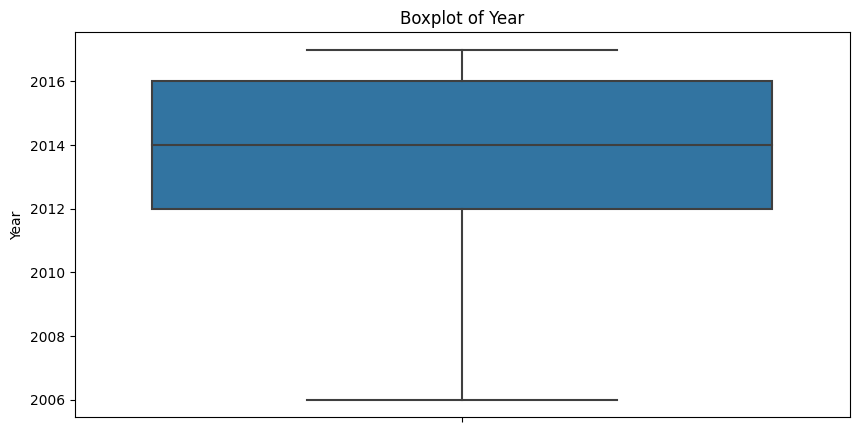

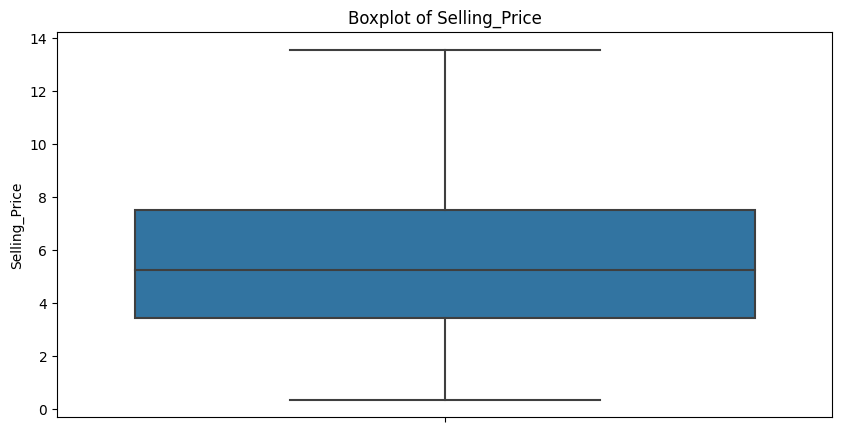

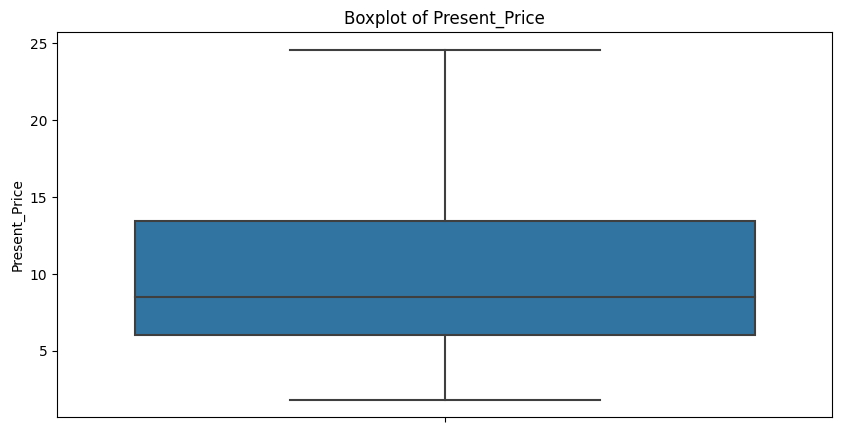

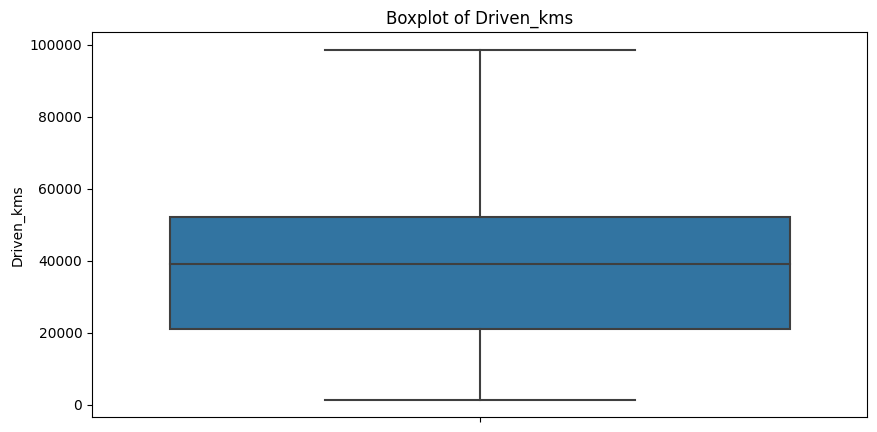

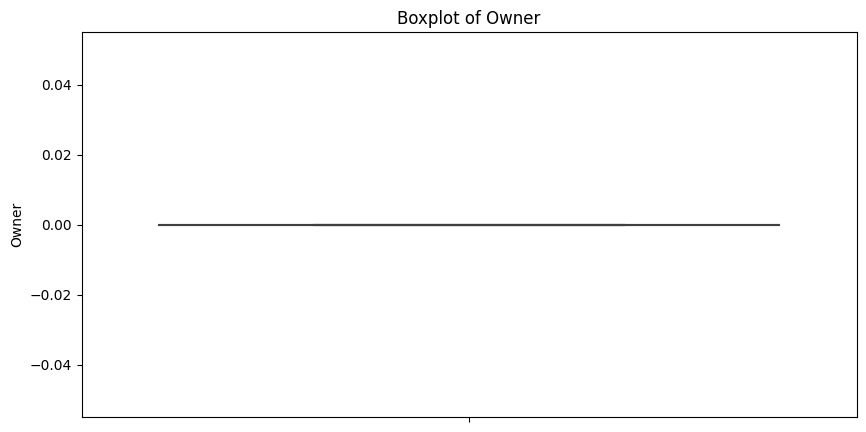

In [15]:
for column in car_price_data.columns:
    if car_price_data[column].dtype!='object':
        plt.figure(figsize=(10,5))
        sns.boxplot(y=column,data=car_price_data)
        plt.title(f'Boxplot of {column}')
        plt.show()


# Feature Engineer

**Data split**

In [16]:
data=car_price_data.copy()
X=data.drop('Selling_Price',axis=1).copy()
Y=data['Selling_Price'].copy()

In [17]:
X

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ciaz,2015.0,8.920,42367.0,Diesel,Dealer,Manual,0.0
1,verna,2012.0,9.400,36100.0,Petrol,Dealer,Manual,0.0
2,ertiga,2016.0,10.790,43000.0,Diesel,Dealer,Manual,0.0
3,city,2016.0,13.600,29223.0,Petrol,Dealer,Manual,0.0
4,innova,2006.0,13.460,98642.5,Diesel,Dealer,Manual,0.0
5,wagon r,2015.0,5.090,35500.0,CNG,Dealer,Manual,0.0
6,city,2015.0,13.600,34000.0,Petrol,Dealer,Manual,0.0
7,ciaz,2017.0,9.850,6900.0,Petrol,Dealer,Manual,0.0
8,dzire,2009.0,7.210,77427.0,Petrol,Dealer,Manual,0.0
9,i10,2011.0,4.600,53460.0,Petrol,Dealer,Manual,0.0


# Feature Encoding

In [18]:
ordinal=OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
ordinal_encode=ordinal.fit(X)
ordinal_encode

OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [19]:
jb.dump(ordinal_encode,'D:/DS NOTE/OASIS INFO BYTE/Car price prediction(used cars)/trian/model/ordinal_encode_model.pkl')

['D:/DS NOTE/OASIS INFO BYTE/Car price prediction(used cars)/trian/model/ordinal_encode_model.pkl']

In [20]:
ordinal_encode=ordinal.transform(X)
ordinal_encode_df=pd.DataFrame(ordinal_encode,columns=X.columns)
ordinal_encode_df


,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,6.0,7.0,34.0,50.0,1.0,0.0,1.0,0.0
1,30.0,4.0,37.0,41.0,2.0,0.0,1.0,0.0
2,14.0,8.0,43.0,52.0,1.0,0.0,1.0,0.0
3,7.0,8.0,48.0,31.0,2.0,0.0,1.0,0.0
4,23.0,0.0,47.0,86.0,1.0,0.0,1.0,0.0
5,31.0,7.0,9.0,38.0,0.0,0.0,1.0,0.0
6,7.0,7.0,48.0,37.0,2.0,0.0,1.0,0.0
7,6.0,9.0,38.0,4.0,2.0,0.0,1.0,0.0
8,11.0,1.0,23.0,81.0,2.0,0.0,1.0,0.0
9,21.0,3.0,6.0,68.0,2.0,0.0,1.0,0.0


In [21]:
ordinal_encode_df.to_csv('D:/DS NOTE/OASIS INFO BYTE/Car price prediction(used cars)/trian/process/ordinal_encode_df.csv',index=False)

In [22]:
x_train,x_test,y_train,y_test=train_test_split(ordinal_encode_df,Y,train_size=0.5,random_state=42)

In [23]:
# x_train,y_train
x_train.to_csv('D:/DS NOTE/OASIS INFO BYTE/Car price prediction(used cars)/trian/raw/x_train.csv',index=False)
y_train.to_csv('D:/DS NOTE/OASIS INFO BYTE/Car price prediction(used cars)/trian/raw/y_train.csv',index=False)
# x_test,y_test
x_test.to_csv('D:/DS NOTE/OASIS INFO BYTE/Car price prediction(used cars)/trian\evaluate/raw/x_test.csv',index=False)
y_test.to_csv('D:/DS NOTE/OASIS INFO BYTE/Car price prediction(used cars)/trian\evaluate/raw/y_test.csv',index=False)

# Model train

In [24]:
rf=RandomForestRegressor(max_depth=4)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=4)

In [25]:
print('Train score',rf.score(x_train,y_train)*100)
print('Test score',rf.score(x_test,y_test)*100)

Train score 96.59735870667946
Test score 61.45720524344347


# FeatureImportance 

<BarContainer object of 8 artists>

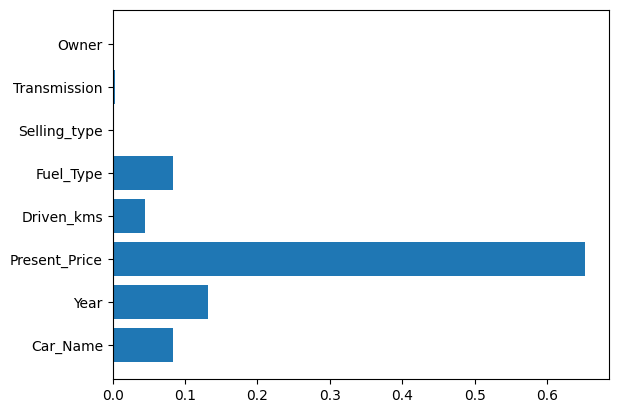

In [26]:
# feature_importances_
plt.barh(X.columns,rf.feature_importances_)

In [27]:
jb.dump(rf,'D:/DS NOTE/OASIS INFO BYTE/Car price prediction(used cars)/trian/model/rf_train_model.pkl')

['D:/DS NOTE/OASIS INFO BYTE/Car price prediction(used cars)/trian/model/rf_train_model.pkl']

# Model prediction

In [28]:
encode_model=jb.load('D:/DS NOTE/OASIS INFO BYTE/Car price prediction(used cars)/trian/model/ordinal_encode_model.pkl')
Model=jb.load('D:/DS NOTE/OASIS INFO BYTE/Car price prediction(used cars)/trian/model/rf_train_model.pkl')

In [29]:
y_pred=pd.DataFrame(Model.predict(x_test))
y_pred=y_pred.rename(columns={0:'Selling_Price'})
y_pred

,Selling_Price
0,4.527550
1,5.956567
2,2.746434
3,3.812228
4,3.237793
5,4.630639
6,3.661048
7,4.285518
8,3.300146
9,6.754224


# Evalution Metrics

In [30]:
# Calculate Mean Squared Error (MSE)
MSE = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
RMSE = np.sqrt(MSE)

# Calculate Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R2_score)
R2 = r2_score(y_test, y_pred)
print(f'MSE= {MSE}\nRMSE = {RMSE}\nMAE = {MAE}\nR2 = {R2}')

MSE= 2.736395348148127
RMSE = 1.6542053524723366
MAE = 1.0773146142921424
R2 = 0.6145720524344347


# PLot

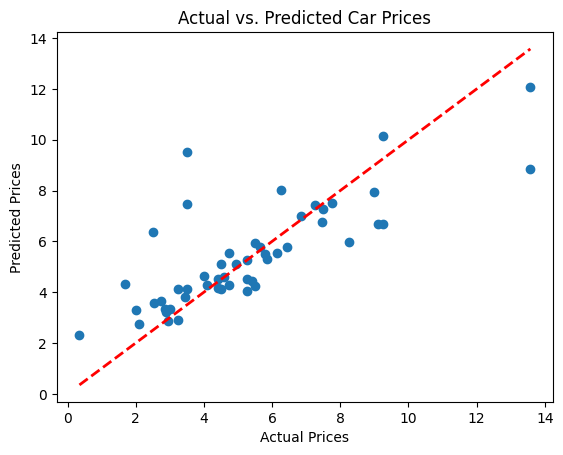

In [36]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title("Actual vs. Predicted Car Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()


**Conclusion:**
- The Random Forest model for predicting car prices is highly effective, with a strong 97% accuracy during training. It provides accurate estimates, as 
  seen in the low Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE). The model explains 61% of the variance in car
  prices (R2 score). 

**Impact:**
- **This work significantly improves our ability to predict car prices accurately**. The model has practical applications for car dealerships, buyers, and sellers, making pricing decisions more informed and efficient. Continued refinement could enhance its impact in various industries relying on precise regression predictions.